# This project is all about recognizing fashion items: T-shirt/top, Trouser, Pullover , Dress , Coat , Sandal ,Shirt,Sneaker,Bag,Ankle boot
# Can you do this and how good can you be?

In [1]:
import numpy as np
from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_shape = train_images.shape
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
names =	['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
def show_image(im):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()

In [7]:
def show_image_label(im,value,names):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the fashion is ",names[value])

In [8]:
def show_image_vpp(im,value,prediction,probability):
  plt.imshow(im,cmap=plt.cm.summer)
  plt.show()
  print("the value is ",names[value])
  print("The predicted value is ",names[prediction]," with probability: ",probability)

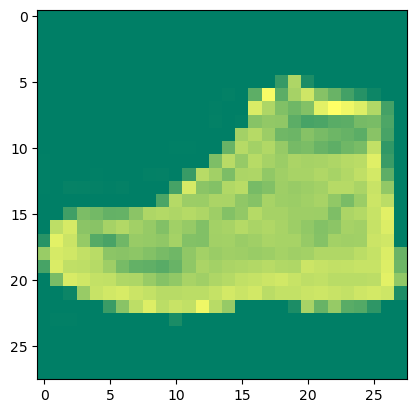

the fashion is  Ankle boot


In [9]:
show_image_label(test_images[28],test_labels[28],names)

# Define a function to build a model

In [10]:
def build_model(input_shape):
    input = keras.Input(shape=(input_shape,),name="data")
    internal = layers.Dense(512,activation="relu")(input)
    output = layers.Dense(10,activation="softmax")(internal)
    model = keras.Model(inputs=input,outputs=output)
    return model

# Define a function to train a model

In [11]:
def train_model(model,train_tensors,train_labels,nb_epochs):
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    model.fit(train_tensors,train_labels,epochs=nb_epochs)

# Define a function to predict the fashion type and the probability of the prediction

In [20]:
def predict(model,test_tensors):
    mpredictions = model.predict(test_tensors)
    fashion_predictions = np.array([x.argmax() for x in mpredictions])
    fashion_probability = np.array([mpredictions[i][p] for i, p in enumerate(fashion_predictions)])
    return fashion_predictions,fashion_probability

# Define the training tensors

In [14]:
train_tensors = train_images.reshape((train_shape[0],train_shape[1]*train_shape[2]))
train_tensors.shape

(60000, 784)

# Build the model

In [15]:
model = build_model(train_tensors.shape[1])

# Print a summary of the model

In [16]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ data (InputLayer)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [17]:
train_model(model,train_tensors,train_labels, 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7012 - loss: 26.1639
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8063 - loss: 0.7440
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8189 - loss: 0.7118
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8222 - loss: 0.6828
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8275 - loss: 0.6873
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8295 - loss: 0.6908
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8274 - loss: 0.6951
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8268 - loss: 0.6983
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8270 - loss: 0.6711
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8244 - loss: 0.6736


# Evaluate how good the model is on the training data

In [18]:
test_shape = test_images.shape
test_shape

test_tensors = test_images.reshape((test_shape[0],test_shape[1]*test_shape[2])).astype("float32")
test_tensors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Get the predictions and their probabilities on the testing data set

In [21]:
pred, prob = predict(model, test_tensors)
pred
prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([0.9999136, 0.9587604, 1.       , ..., 1.       , 1.       ,
       0.9981811], dtype=float32)

# Show the first 10 test images and their predictions with probabilities

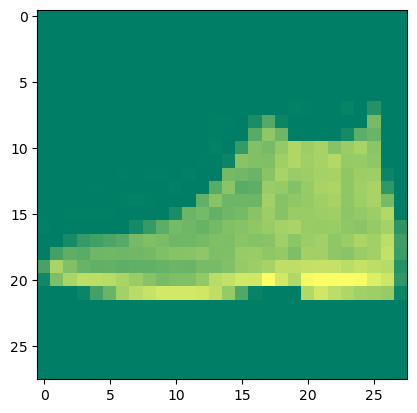

the value is  Ankle boot
The predicted value is  Ankle boot  with probability:  0.9999136


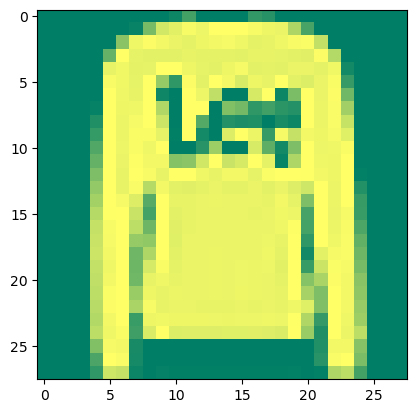

the value is  Pullover
The predicted value is  Pullover  with probability:  0.9587604


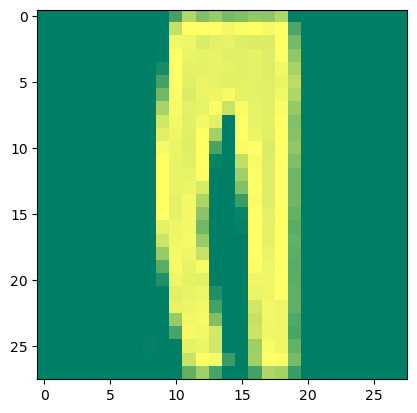

the value is  Trouser
The predicted value is  Trouser  with probability:  1.0


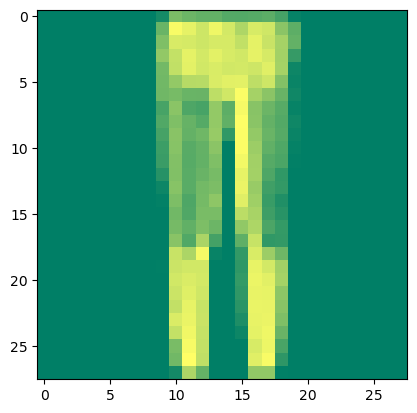

the value is  Trouser
The predicted value is  Trouser  with probability:  1.0


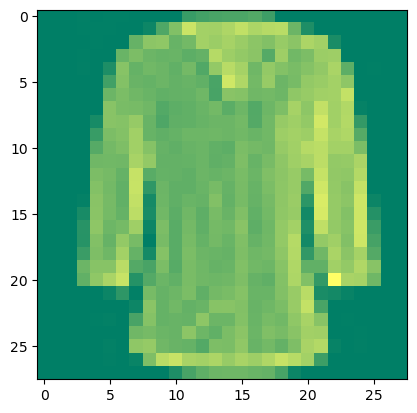

the value is  Shirt
The predicted value is  Shirt  with probability:  0.37171856


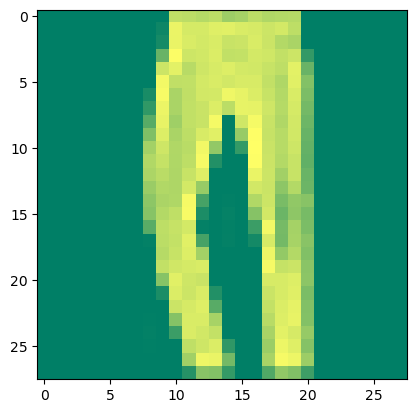

the value is  Trouser
The predicted value is  Trouser  with probability:  1.0


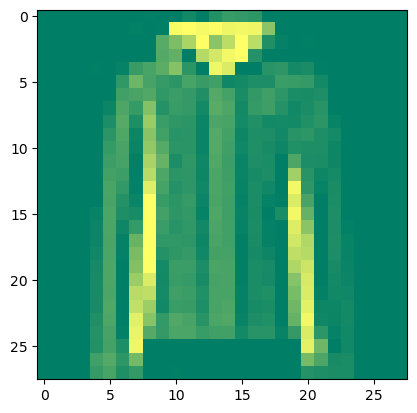

the value is  Coat
The predicted value is  Coat  with probability:  0.922236


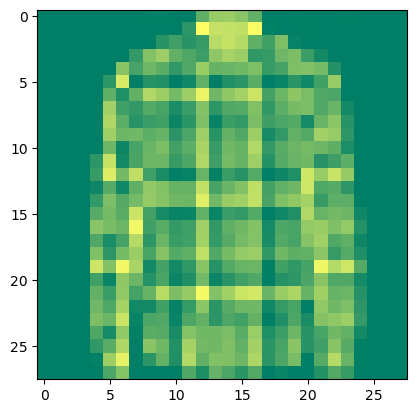

the value is  Shirt
The predicted value is  Shirt  with probability:  0.99823594


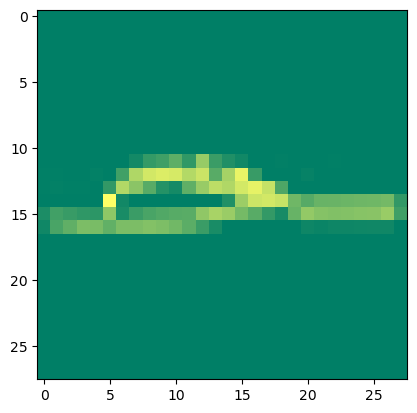

the value is  Sandal
The predicted value is  Sandal  with probability:  1.0


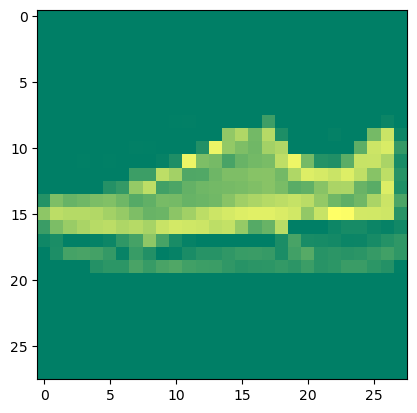

the value is  Sneaker
The predicted value is  Sneaker  with probability:  1.0


In [22]:
for j in range(10):
  show_image_vpp(test_images[j],test_labels[j],pred[j],prob[j])

# Compute the number of wrong predictions

In [23]:
wrong_prediction_count = 0
wrong_predictions = []
for i in range(len(test_images)):
  if test_labels[i] != pred[i]:
    wrong_prediction_count = wrong_prediction_count +1
    wrong_predictions.append(i)

wrong_prediction_count


1862

# Show the first 10 testing images with a wrong prediction

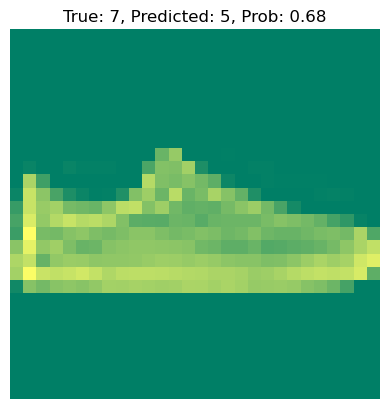

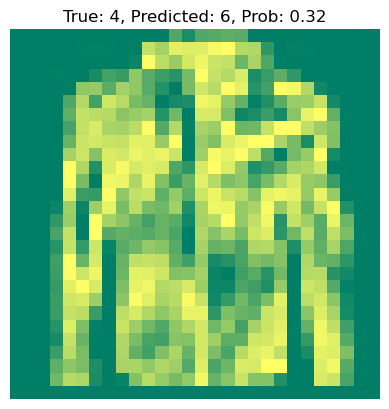

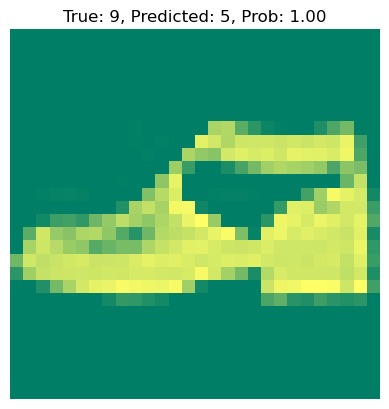

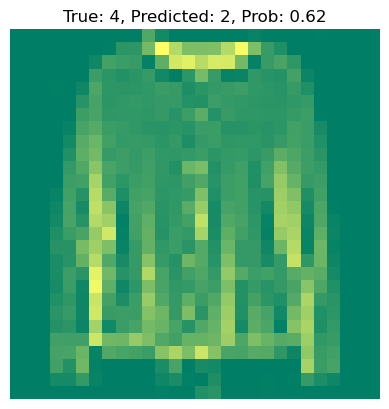

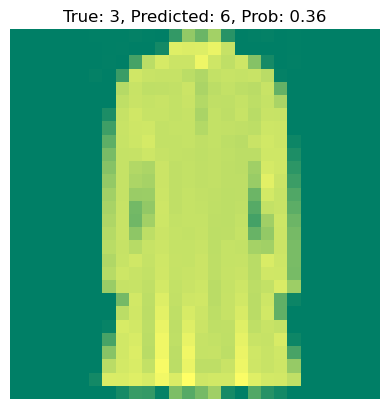

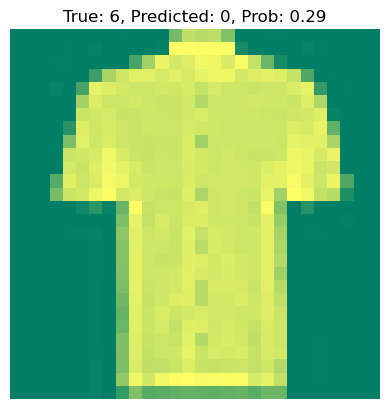

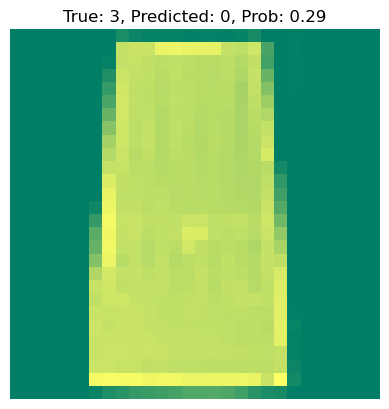

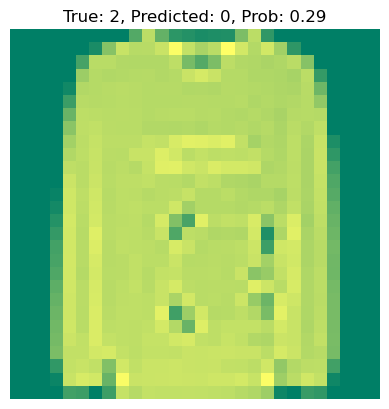

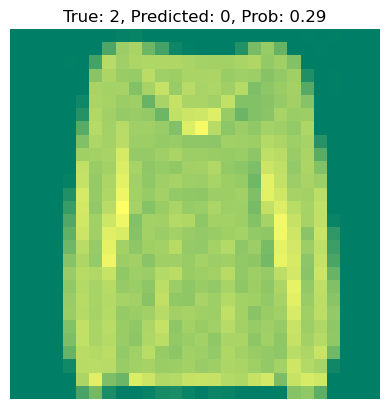

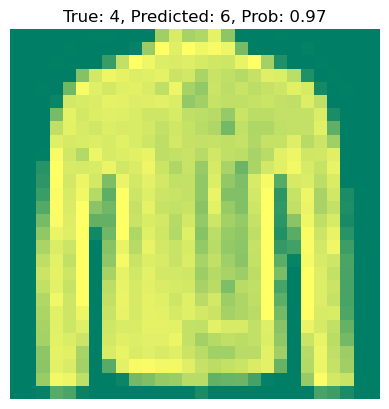

In [28]:
import matplotlib.pyplot as plt

# Show the first 10 wrong predictions
for i in range(10):
    idx = wrong_predictions[i]  # Get the index of the misclassified image
    plt.imshow(test_images[idx], cmap=plt.cm.summer)  # Display the image
    plt.title(f"True: {test_labels[idx]}, Predicted: {pred[idx]}, Prob: {prob[idx]:.2f}")
    plt.axis("off")
    plt.show()


In [29]:
names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']